# readme
jupyterlab from https://esgf-pyclient.readthedocs.io/en/latest/notebooks/demo/subset-cmip6.html

# Search CMIP6 Dataset with ESGF pyclient

In [1]:
import numpy as np
import xarray as xr
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-node.llnl.gov/esg-search', distrib=True)

In [2]:
ctx = conn.new_context(
    project='CMIP6',
    source_id='EC-Earth3P-HR',
    experiment_id='hist-1950',
    variable='uo')
ctx.hit_count

6

In [3]:
result = ctx.search()[0]
result.dataset_id

'CMIP6.HighResMIP.EC-Earth-Consortium.EC-Earth3P-HR.hist-1950.r3i1p2f1.Omon.uo.gn.v20190214|esgf-data1.llnl.gov'

In [4]:
files = result.file_context().search()
for file in files:
    print(file.opendap_url)

http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_195001-195012.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_195101-195112.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_195201-195212.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_195301-195312.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_

In [9]:
tindx=10
# files[ii].opendap_url
infiles = []
# 195001 is the first file, 195002 is the second file
tindx1 = (1979-1950)
tindx2 = (2014+1-1950)
for tindx in np.arange(tindx1,tindx2):
    infiles.append(files[tindx].opendap_url)

print(len(infiles), (2014-1979+1))   
print(infiles[0:2])
print(infiles[-2:])

36 36
['http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_197901-197912.nc', 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_198001-198012.nc']
['http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_201301-201312.nc', 'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r3i1p2f1/Omon/uo/gn/v20190214/uo_Omon_EC-Earth3P-HR_hist-1950_r3i1p2f1_gn_201401-201412.nc']


In [18]:
# infiles = [files[0].opendap_url, files[1].opendap_url, files[10].opendap_url]

['https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/NERC/HadGEM3-GC31-HH/hist-1950/r1i1p1f1/Omon/uo/gn/v20200514/uo_Omon_HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_195001-195001.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/NERC/HadGEM3-GC31-HH/hist-1950/r1i1p1f1/Omon/uo/gn/v20200514/uo_Omon_HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_195002-195002.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/NERC/HadGEM3-GC31-HH/hist-1950/r1i1p1f1/Omon/uo/gn/v20200514/uo_Omon_HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_195011-195011.nc']

# Subset over multiple datasets

In [10]:
ds = xr.open_dataset(infiles[0],chunks={'i': 100})
ds

<xarray.Dataset>
Dimensions:             (time: 12, bnds: 2, lev: 75, j: 1050, i: 1442, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1979-01-16T12:00:00 ... 1979-12...
  * lev                 (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j                   (j) int32 1 2 3 4 5 6 ... 1045 1046 1047 1048 1049 1050
  * i                   (i) int32 1 2 3 4 5 6 ... 1437 1438 1439 1440 1441 1442
    latitude            (j, i) float32 dask.array<chunksize=(1050, 100), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(1050, 100), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(1050, 100, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(1050, 100, 4), meta=np.ndarray>
    uo                  (time, lev, j, i) float32 dask.array<chunksize=(12, 75, 1050, 100), meta=np.ndarray>
Attributes: (12/48)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   none provided
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    ...                              ...
    variant_label:                   r3i1p2f1
    license:                         CMIP6 model data produced by EC-Earth-Co...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/bbb4307b-700f-4a74-93f2-404...
    history:                         2020-01-17T15:40:01Z BranchTimeDelete, H...
    DODS_EXTRA.Unlimited_Dimension:  time

In [11]:
a = ds.uo.sel(lev=15, method='nearest').compute()
a

<xarray.DataArray 'uo' (time: 12, j: 1050, i: 1442)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 1979-12-16T12:00:00
    lev        float64 13.99
  * j          (j) int32 1 2 3 4 5 6 7 8 ... 1044 1045 1046 1047 1048 1049 1050
  * i          (i) int32 1 2 3 4 5 6 7 8 ... 1436 1437 1438 1439 1440 1441 1442
    latitude   (j, i) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    longitude  (j, i) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:   sea_water_x_velocity
    long_name:       Sea Water X Velocity
    comment:         Prognostic x-ward velocity component resolved by the model.
    units:           m s-1
    original_name:   uo
    original_units:  m/s
    history:         2019-03-30T02:30:11Z altered by CMOR: Converted units fr...
    cell_methods:    time: mean
    _ChunkSizes:     [  1  15 210 289]

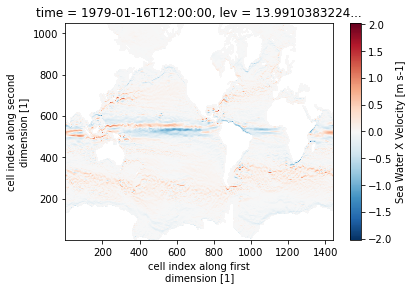

In [12]:
a.isel(time=0).plot()

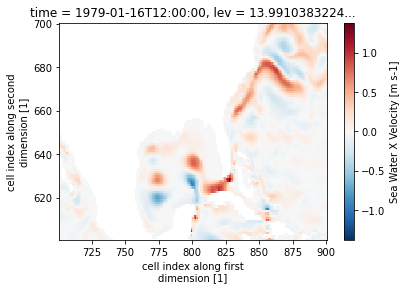

In [14]:
a.isel(time=0,i=slice(700,900), j=slice(600,700)).plot()

In [51]:
ds_agg = xr.open_mfdataset(infiles[0:12], combine='nested', concat_dim='time')
print(ds_agg)

KeyboardInterrupt: 

In [9]:
da = ds_agg['tas']
da = da.isel(time=slice(1200, 1201))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

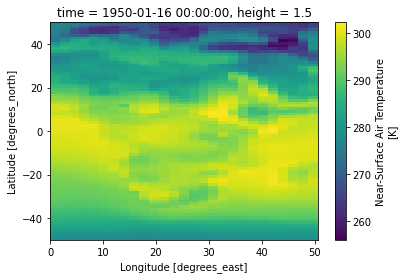

In [10]:
da.plot()

# Download datset

In [11]:
da.to_netcdf('tas_africa_19500116.nc')